# Assignment2 - Supervised Learning flow

## Part 1 - Student details:

In [2]:
# student 1: Shirly 3061
# student 2: Shani 7792

## Part 2 - Initial Preparations 

Import

In [3]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# Models Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix

# Split the training data into training and validation sets 
from sklearn.model_selection import train_test_split




Load data

In [ ]:
# Load the training and test datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

Display the first 5 rows

In [5]:
print(train_df.head())
print(test_df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


## <u> Exploratory Data Analysis (EDA) </u>


### Displaying statistics and data visualizations

#### statistics

Display basic statistics - train

In [6]:
print(train_df.describe())

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

Display basic statistics - test

In [7]:
print(test_df.describe())

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  179.000000  179.000000  179.000000  179.000000  179.000000  179.000000   
mean     2.363128    0.675978   30.366983    0.502793    0.368715   31.507239   
std      0.812116    0.469321   12.246691    1.278053    0.819923   49.254330   
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   24.000000    0.000000    0.000000    7.895800   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   12.000000   
75%      3.000000    1.000000   36.000000    1.000000    0.000000   27.825000   
max      3.000000    1.000000   71.000000    8.000000    5.000000  263.000000   

         Embarked    Survived  
count  179.000000  179.000000  
mean     0.351955    0.340782  
std      0.639640    0.475302  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

#### Visualization 

#### **1. Passenger Class Distribution: Analysis of Outcomes**
Passenger class (Pclass) was a key determinant of survival on the Titanic, reflecting the stark social inequalities of the time. These plots compare survival rates across the three classes: first, second, and third.

#### Passenger Class Distribution (General)
This plot shows the distribution of passengers across the three classes, giving us a sense of the social structure onboard the Titanic.

**Key Observations**:
- **Majority in third class**: Around 55% of the passengers were in third class, reflecting the economic diversity onboard. Around 25% were in second class, and 20% were in first class.

#### Passenger Class Distribution of Survivors
This plot highlights the survival rates among passengers in each class.

**Key Observations**:
- **First-class passengers had the highest survival rate**: Approximately 65% of first-class passengers survived. Their location near the lifeboats and higher social status gave them greater access to rescue efforts.
- **Second-class passengers had moderate survival chances**: Around 45% of second-class passengers survived, suggesting that they had less access to lifeboats compared to first-class passengers but fared better than third-class passengers.
- **Third-class passengers had the lowest survival rate**: Only 25% of third-class passengers survived. Their location in the lower decks and lower priority in the evacuation process greatly reduced their chances of survival.

#### Passenger Class Distribution of Non-Survivors
This plot shows the class distribution of passengers who did not survive.

**Key Observations**:
- **Majority of non-survivors were in third class**: About 75% of non-survivors were third-class passengers, highlighting their low survival rate.
- **Fewer first-class non-survivors**: Only around 15% of non-survivors were from first class, reflecting their high survival priority.

**Conclusion**: **65% of first-class passengers survived**, while only **25% of third-class passengers** managed to escape. This stark difference reflects the influence of social class on survival, with first-class passengers having far greater access to lifeboats and higher priority during evacuation.


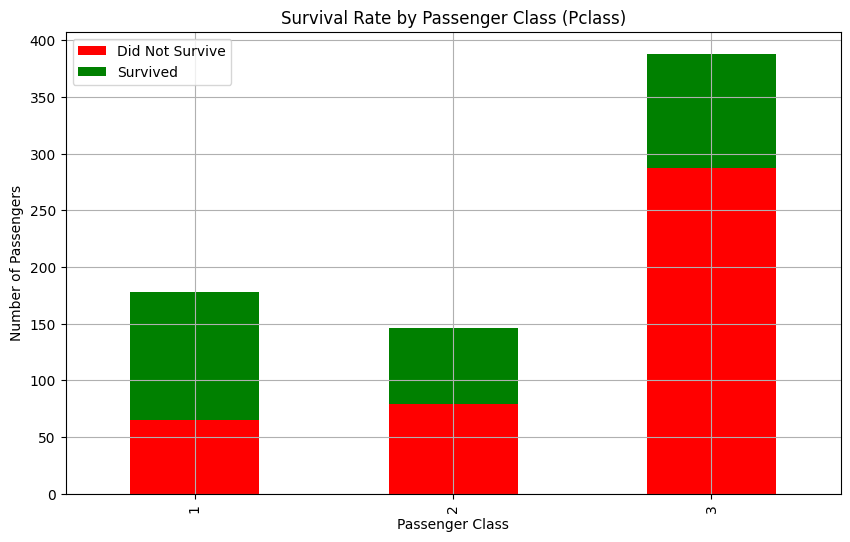

In [8]:
# Group by Pclass and Survived, then get size and unstack, fill NaN with 0, and convert to integers
pclass_survival_counts = train_df.groupby(['Pclass', 'Survived']).size().unstack().fillna(0).astype(int)

# Plot the bar chart
pclass_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title("Survival Rate by Passenger Class (Pclass)")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive", "Survived"])
plt.grid(True)
plt.show()

#### **2. Gender Distribution: Analysis of Survival Outcomes**

Gender played a crucial role in determining survival during the Titanic disaster. This chart focuses exclusively on the gender distribution of passengers and their survival rates, providing insight into how survival was affected solely by gender.

### Gender Distribution (General)
This plot illustrates the overall gender distribution of passengers on the Titanic. It provides a clear sense of the number of men and women onboard and their respective survival outcomes.

**Key Observations**:
- **More men than women**: Roughly **65%** of the passengers were men, while **35%** were women. This highlights the fact that a greater number of men were traveling, likely for work or economic purposes, whereas women constituted a smaller portion of the passenger population.

This demographic breakdown is important as it sets the stage for understanding the impact of gender on survival outcomes during the disaster.

### Gender Distribution of Survivors
This segment of the chart highlights the survival rates for both male and female passengers, showcasing the stark difference between the genders when it came to survival.

**Key Observations**:
- **Women had a significantly higher survival rate**: Approximately **75% of female passengers survived**, reflecting the prevalent social norms and the application of the **"women and children first"** policy during evacuation. Women were given priority when it came to securing spots on lifeboats.
  
- **Very few male survivors**: Only about **20% of male passengers survived**. This low survival rate reflects the lower priority given to men during the evacuation. Men were often expected to yield their places to women and children, which significantly decreased their chances of survival.

This disparity highlights the role that societal values played in determining survival, where men were generally left behind to ensure that women and children were evacuated first.

### Gender Distribution of Non-Survivors
This part of the plot shows the distribution of male and female passengers who did not survive, offering a reverse perspective to the survival chart.

**Key Observations**:
- **Most non-survivors were men**: About **85% of the passengers who did not survive** were men. This stark figure underscores the reality that men were far less likely to secure a place on lifeboats, resulting in a significantly higher death toll for male passengers.

- **Few female non-survivors**: Only **15% of those who did not survive** were women. While some women in lower classes faced challenges in accessing lifeboats, the overall survival rate for women was much higher, largely due to the prioritization policies in place.

This observation emphasizes that gender was one of the most influential factors in determining who lived and who perished during the disaster.

### Conclusion
The Titanic disaster's gender-based survival rates reveal a significant imbalance:
- **Women were much more likely to survive** than men due to the "women and children first" evacuation policy.
- **Men, particularly those in lower-class positions**, had a far lower chance of survival, often sacrificing their opportunity for rescue so that women and children could be saved. This resulted in **85% of non-survivors being male**.
  
The dramatic difference in survival rates between men and women highlights the crucial role that gender played in determining the fate of passengers during the Titanic disaster.


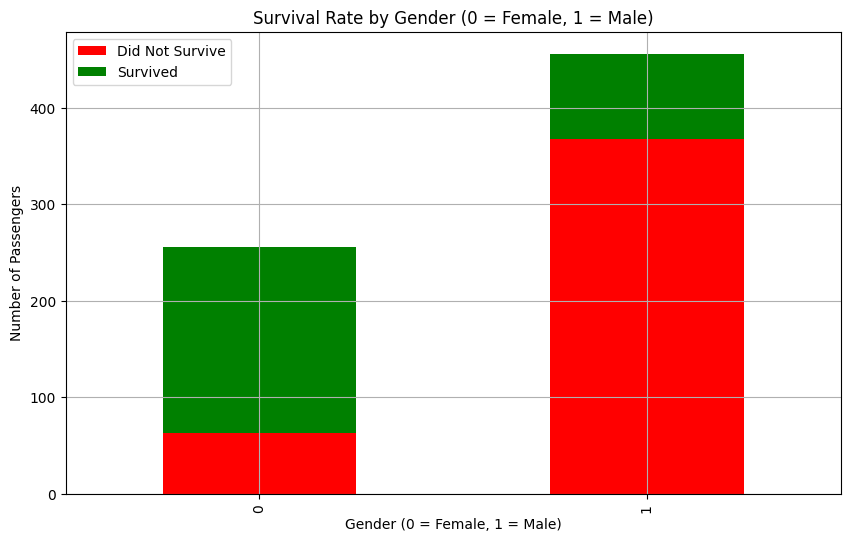

In [9]:
train_df['Survived'] = train_df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})  # Map 'Survived' to categories

# Group by 'Sex' and 'Survived' to get counts
gender_survival_counts = train_df.groupby(['Sex', 'Survived']).size().unstack().fillna(0)

# Plot the stacked bar chart with 'Sex' as binary (0: Female, 1: Male)
ax = gender_survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Set the title, labels, and custom legend
plt.title("Survival Rate by Gender (0 = Female, 1 = Male)")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive", "Survived"])

# Display the plot
plt.grid(True)
plt.show()


#### **3. Age Distribution: Analysis of Outcomes**
This analysis focuses on the age demographics of passengers, showing how age impacted survival. Age is a key factor in understanding survival, as children were prioritized during evacuation, and older passengers may have faced physical challenges in reaching lifeboats.

#### Age Distribution (General)
This plot illustrates the overall age distribution of Titanic passengers, providing insights into the age ranges of those onboard.

**Key Observations**:
- **Wide range of ages**: The ages of passengers range from infants to the elderly, with the majority (about 60%) between 20 to 40 years old.
- **Fewer children and elderly passengers**: Around 15% of passengers were children under 10, and 10% were elderly (over 60).

#### Age Distribution of Survivors
This plot shows the age distribution of passengers who survived, offering insights into which age groups were more likely to be saved.

**Key Observations**:
- **High survival rate for children**: About 75% of children under 10 survived the disaster. This reflects the "women and children first" policy.
- **Many survivors aged 20-40**: Over 50% of survivors were adults aged 20-40, which corresponds to the largest group of passengers onboard.

#### Age Distribution of Non-Survivors
This plot shows the age distribution of passengers who did not survive.

**Key Observations**:
- **High number of non-survivors in the 20-40 age range**: Approximately 70% of non-survivors were adults aged 20 to 40. This indicates that while this age group was the most common onboard, they were also less likely to survive compared to children.
- **Low number of child non-survivors**: Only about 15% of children (under 10) perished, confirming that children were prioritized during the evacuation.
- **Elderly passengers had low survival rates**: Around 80% of elderly passengers (over 60) did not survive the disaster, likely due to physical limitations or low priority in the evacuation process.

**Conclusion**: Age played a critical role in survival, with **75% of children under 10** surviving, while **70% of adults aged 20-40** and **80% of elderly passengers** did not survive. The survival of younger passengers reflects the prioritization of children during evacuation, while middle-aged adults and elderly passengers faced more challenges.



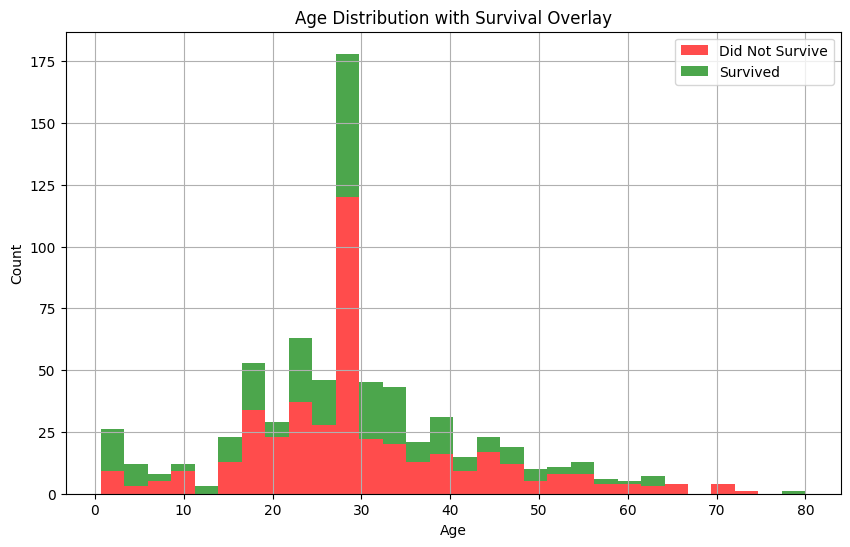

In [10]:
# Temporarily map 'Survived' back to 0 and 1 for numeric comparisons
train_df['Survived_numeric'] = train_df['Survived'].map({'Did Not Survive': 0, 'Survived': 1})

# Separate the survivors and non-survivors by numeric values
survived = train_df[train_df['Survived_numeric'] == 1]['Age'].dropna()
not_survived = train_df[train_df['Survived_numeric'] == 0]['Age'].dropna()

# Calculate the histograms for survivors and non-survivors
total_counts, bin_edges = np.histogram(train_df['Age'].dropna(), bins=30)
survived_counts, _ = np.histogram(survived, bins=bin_edges)
not_survived_counts, _ = np.histogram(not_survived, bins=bin_edges)

# Create the bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plotting the stacked bar chart for age distribution
plt.figure(figsize=(10, 6))

# Plot non-survivor counts (red) first
plt.bar(bin_centers, not_survived_counts, width=bin_edges[1] - bin_edges[0], color='red', label='Did Not Survive', alpha=0.7)

# Plot survivor counts (green) stacked on top
plt.bar(bin_centers, survived_counts, width=bin_edges[1] - bin_edges[0], bottom=not_survived_counts, color='green', label='Survived', alpha=0.7)

# Add labels, title, and legend
plt.title('Age Distribution with Survival Overlay')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Remove the temporary 'Survived_numeric' column
train_df.drop(columns='Survived_numeric', inplace=True)


#### **4. Fare Distribution: Analysis of Outcomes**
The following plots explore the fare distribution among all passengers, survivors, and non-survivors. Ticket prices (fares) reflect the socio-economic differences among passengers, which strongly impacted survival chances.

#### Fare Distribution (General)
This graph gives a sense of the overall fare distribution among Titanic passengers. The fare range varies significantly, with a sharp concentration around lower fares and a long tail representing a few very high-paying passengers.

**Key Observations**:
- **Most passengers paid lower fares**: Around 75% of the passengers paid fares under 50 units, reflecting the large number of third-class travelers.
- **Few high-paying passengers**: Only about 5% of the passengers paid more than 100 units, likely corresponding to first-class travelers.

#### Fare Distribution of Survivors
This plot highlights the fare distribution of passengers who survived the disaster.

**Key Observations**:
- **Higher fare, higher chance of survival**: Over 60% of the survivors paid fares higher than 50 units. First-class passengers, who paid more for their tickets, had better access to lifeboats and were more likely to survive.
- **Low survival rate at lower fares**: About 20% of survivors paid fares under 20 units, indicating that some third-class passengers did survive but were a minority compared to those who paid higher fares.

#### Fare Distribution of Non-Survivors
This plot explores the fare distribution for passengers who did not survive.

**Key Observations**:
- **Most non-survivors paid lower fares**: Approximately 85% of those who perished paid fares under 50 units, primarily representing third-class passengers.
- **Fewer high-paying passengers among non-survivors**: Only 2-3% of non-survivors paid more than 100 units, reflecting that most high-fare passengers (first-class) survived.

**Conclusion**: The fare a passenger paid significantly influenced their survival chances. Passengers who paid higher fares (often corresponding to first-class) had a much better chance of surviving (around 60% of survivors paid higher fares), while lower fares were associated with much lower survival rates (85% of non-survivors paid lower fares).


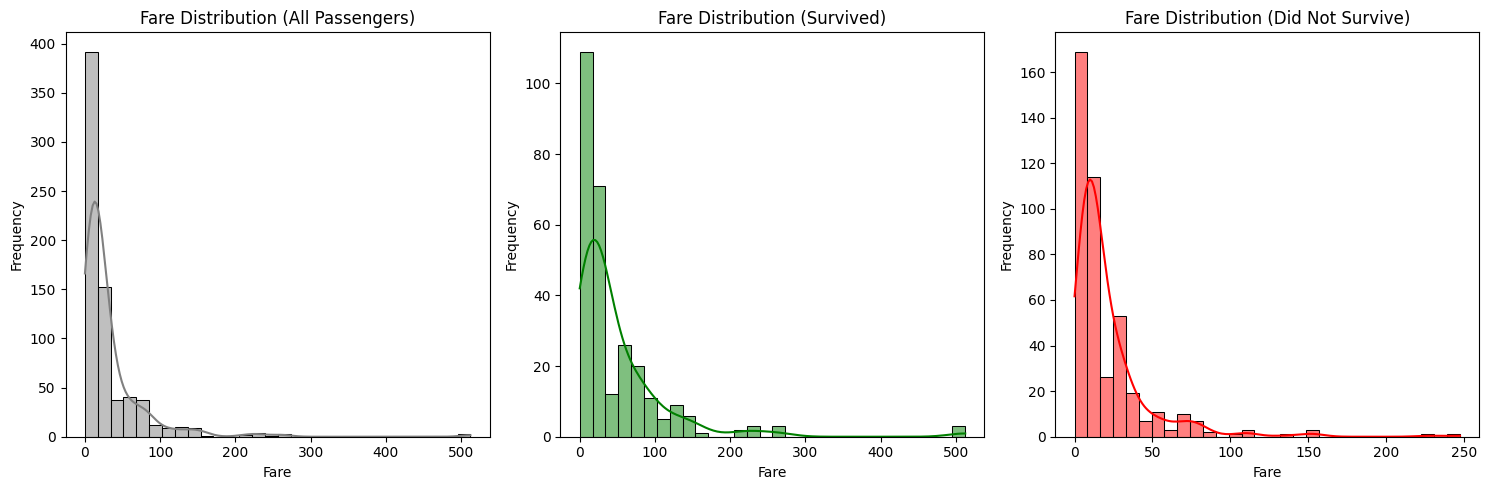

In [11]:
# Temporarily map 'Survived' back to 0 and 1 for numeric comparisons
train_df['Survived_numeric'] = train_df['Survived'].map({'Did Not Survive': 0, 'Survived': 1})

plt.figure(figsize=(15, 5))

# General Fare Distribution (all passengers)
plt.subplot(1, 3, 1)
sns.histplot(train_df['Fare'].dropna(), bins=30, color='grey', kde=True)
plt.title("Fare Distribution (All Passengers)")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# Fare Distribution for Survivors (Survived == 1)
plt.subplot(1, 3, 2)
sns.histplot(train_df[train_df['Survived_numeric'] == 1]['Fare'].dropna(), bins=30, color='green', kde=True)
plt.title("Fare Distribution (Survived)")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# Fare Distribution for Non-Survivors (Survived == 0)
plt.subplot(1, 3, 3)
sns.histplot(train_df[train_df['Survived_numeric'] == 0]['Fare'].dropna(), bins=30, color='red', kde=True)
plt.title("Fare Distribution (Did Not Survive)")
plt.xlabel("Fare")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Remove the temporary 'Survived_numeric' column
train_df.drop(columns='Survived_numeric', inplace=True)


## Part 3 - Experiments

### Managing the experiments with cross validation, experience with Engineering Feature and experience with models and hyper-parameters

##### Creating New Features -FamilySize
Combine 'SibSp' and 'Parch' to create a new feature 'FamilySize'.

In [12]:
# Creating FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

print(train_df[['SibSp', 'Parch', 'FamilySize']].head())
print(test_df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      0      0           1
2      0      0           1
3      0      0           1
4      0      0           1
   SibSp  Parch  FamilySize
0      0      0           1
1      0      0           1
2      0      0           1
3      0      0           1
4      0      0           1


##### `FamilySize` Feature Explanation

The **'FamilySize'** feature combines two existing columns from the Titanic dataset: **'SibSp'** (number of siblings or spouses aboard) and **'Parch'** (number of parents or children aboard). This new feature calculates the total number of family members accompanying a passenger on the Titanic, including the passenger themselves.

##### Purpose of Creating the 'FamilySize' Feature

The motivation behind creating the **'FamilySize'** feature is to capture how the presence of family members might have influenced a passenger's survival odds. Traveling with family could have several possible effects:

- **Support and Coordination**: Passengers with family members may have had better coordination or assistance, which could increase their survival chances during the disaster.
  
- **Evacuation Preference**: Families, especially those with children, might have been given preference during lifeboat evacuation, increasing their likelihood of surviving.

- **Social Decision-Making**: Being with family could have affected decision-making or influenced social interactions in critical moments, impacting survival.

##### How It’s Calculated?

The **'FamilySize'** feature is generated by adding the values of **'SibSp'** and **'Parch'**, and then adding **1** to account for the passenger themselves:

_FamilySize = SibSp + Parch + 1_


**Example**: Another passenger traveling with **no siblings or spouses** and **3 parents/children** would have their **'FamilySize'** calculated as:

_FamilySize = 0 (SibSp) + 3 (Parch) + 1 (Passenger themselves) = 4_


#####  `IsAlone` Feature 

The 'IsAlone' feature is a binary variable that indicates whether a passenger was traveling alone. It is derived from the **'FamilySize'** feature:
- If **FamilySize = 1**, the **IsAlone** feature is set to **1** (indicating the passenger was alone).
- If **FamilySize > 1**, the **IsAlone** feature is set to **0** (indicating the passenger was traveling with family members).

This feature is useful for understanding how traveling alone versus traveling with family affected survival chances.






In [13]:
# Creating IsAlone feature
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

print(train_df[['FamilySize', 'IsAlone']].head())
print(test_df[['FamilySize', 'IsAlone']].head())

   FamilySize  IsAlone
0           2        0
1           1        1
2           1        1
3           1        1
4           1        1
   FamilySize  IsAlone
0           1        1
1           1        1
2           1        1
3           1        1
4           1        1


### Creating the `AgeGroup` Feature

In this step, we create a new categorical feature called **'AgeGroup'** based on the passenger's age. This feature groups passengers into different age categories, which can help capture potential patterns related to age and survival rates.

#### Explanation of 'AgeGroup' Creation:
The age ranges are defined as follows:

- **Child**: Passengers who are between 0 and 12 years old.
- **Teenager**: Passengers who are between 12 and 18 years old.
- **Young Adult**: Passengers who are between 18 and 25 years old.
- **Adult**: Passengers who are between 25 and 35 years old.
- **Senior**: Passengers who are between 35 and 60 y

In [14]:
# Creating AgeGroup feature
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 25, 35, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Elder'])
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 25, 35, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Elder'])

print(train_df[['Age', 'AgeGroup']].head())
print(test_df[['Age', 'AgeGroup']].head())

    Age     AgeGroup
0  54.0       Senior
1  45.0       Senior
2  20.0  Young Adult
3  36.0       Senior
4  22.0  Young Adult
         Age     AgeGroup
0  35.000000        Adult
1  30.000000        Adult
2  29.699118        Adult
3  21.000000  Young Adult
4  32.000000        Adult


##### Age-Pclass Interaction
We can create a new feature by multiplying the 'Age' and 'Pclass' features. This feature will represent the combined effect of age and class on survival.

In [15]:
# Creating Age_Pclass interaction feature
train_df['Age_Pclass'] = train_df['Age'] * train_df['Pclass']
test_df['Age_Pclass'] = test_df['Age'] * test_df['Pclass']

print(train_df[['Age', 'Pclass', 'Age_Pclass']].head())
print(test_df[['Age', 'Pclass', 'Age_Pclass']].head())

    Age  Pclass  Age_Pclass
0  54.0       1        54.0
1  45.0       2        90.0
2  20.0       3        60.0
3  36.0       3       108.0
4  22.0       3        66.0
         Age  Pclass  Age_Pclass
0  35.000000       3  105.000000
1  30.000000       3   90.000000
2  29.699118       3   89.097353
3  21.000000       3   63.000000
4  32.000000       3   96.000000


### Encoding Categorical Features

In [16]:
# Encoding categorical features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True)

print(train_df.head())
print(test_df.head())

   Pclass   Age  SibSp  Parch     Fare         Survived  FamilySize  IsAlone  \
0       1  54.0      1      0  78.2667         Survived           2        0   
1       2  45.0      0      0  13.5000         Survived           1        1   
2       3  20.0      0      0   9.5000  Did Not Survive           1        1   
3       3  36.0      0      0   7.8958  Did Not Survive           1        1   
4       3  22.0      0      0   8.0500  Did Not Survive           1        1   

   Age_Pclass  Sex_1  Embarked_1  Embarked_2  Embarked_3  AgeGroup_Teenager  \
0        54.0  False        True       False       False              False   
1        90.0  False       False       False       False              False   
2        60.0   True       False       False       False              False   
3       108.0   True       False       False       False              False   
4        66.0   True       False       False       False              False   

   AgeGroup_Young Adult  AgeGroup_Adult  Age

### Scaling Features


Standardize numerical features such as 'Age', 'Fare', 'FamilySize', and the new 'Age_Pclass' feature.



In [17]:
# Scaling numerical features using StandardScaler
scaler_standard = StandardScaler()
numeric_features = ['Age', 'Fare', 'FamilySize', 'Age_Pclass']
train_df_standard = train_df.copy()
test_df_standard = test_df.copy()
train_df_standard[numeric_features] = scaler_standard.fit_transform(train_df_standard[numeric_features])
test_df_standard[numeric_features] = scaler_standard.transform(test_df_standard[numeric_features])

print(train_df_standard[numeric_features].head())
print(test_df_standard[numeric_features].head())

        Age      Fare  FamilySize  Age_Pclass
0  1.856683  0.921411    0.055534   -0.305684
1  1.173766 -0.379097   -0.582210    0.770569
2 -0.723225 -0.459416   -0.582210   -0.126308
3  0.490849 -0.491629   -0.582210    1.308695
4 -0.571466 -0.488532   -0.582210    0.053067
        Age      Fare  FamilySize  Age_Pclass
0  0.414970 -0.508612    -0.58221    1.219007
1  0.035571 -0.504596    -0.58221    0.770569
2  0.012741 -0.359017    -0.58221    0.743583
3 -0.647345 -0.494556    -0.58221   -0.036620
4  0.187331  0.484254    -0.58221    0.949944


Min-Max Scaling


In [18]:
# Scaling numerical features using MinMaxScaler
scaler_minmax = MinMaxScaler()
train_df_minmax = train_df.copy()
test_df_minmax = test_df.copy()
train_df_minmax[numeric_features] = scaler_minmax.fit_transform(train_df_minmax[numeric_features])
test_df_minmax[numeric_features] = scaler_minmax.transform(test_df_minmax[numeric_features])

print(train_df_minmax[numeric_features].head())
print(test_df_minmax[numeric_features].head())

        Age      Fare  FamilySize  Age_Pclass
0  0.672255  0.152766         0.1    0.240094
1  0.558805  0.026350         0.0    0.402931
2  0.243666  0.018543         0.0    0.267234
3  0.445355  0.015412         0.0    0.484350
4  0.268877  0.015713         0.0    0.294373
        Age      Fare  FamilySize  Age_Pclass
0  0.432749  0.013761         0.0    0.470780
1  0.369721  0.014151         0.0    0.402931
2  0.365929  0.028302         0.0    0.398848
3  0.256271  0.015127         0.0    0.280803
4  0.394933  0.110272         0.0    0.430071


Align the training and test datasets to ensure they have the same columns.

In [19]:
# Aligning the datasets for both scaling methods

# StandardScaler
X_train_standard = train_df_standard.drop(columns=['Survived'])
y_train_standard = train_df_standard['Survived']
X_test_standard = test_df_standard

# Ensuring the test set has the same columns as the train set
X_test_standard = X_test_standard.reindex(columns=X_train_standard.columns, fill_value=0)

print(X_train_standard.head())
print(X_test_standard.head())

# MinMaxScaler
X_train_minmax = train_df_minmax.drop(columns=['Survived'])
y_train_minmax = train_df_minmax['Survived']
X_test_minmax = test_df_minmax

# Ensuring the test set has the same columns as the train set
X_test_minmax = X_test_minmax.reindex(columns=X_train_minmax.columns, fill_value=0)

print(X_train_minmax.head())
print(X_test_minmax.head())

   Pclass       Age  SibSp  Parch      Fare  FamilySize  IsAlone  Age_Pclass  \
0       1  1.856683      1      0  0.921411    0.055534        0   -0.305684   
1       2  1.173766      0      0 -0.379097   -0.582210        1    0.770569   
2       3 -0.723225      0      0 -0.459416   -0.582210        1   -0.126308   
3       3  0.490849      0      0 -0.491629   -0.582210        1    1.308695   
4       3 -0.571466      0      0 -0.488532   -0.582210        1    0.053067   

   Sex_1  Embarked_1  Embarked_2  Embarked_3  AgeGroup_Teenager  \
0  False        True       False       False              False   
1  False       False       False       False              False   
2   True       False       False       False              False   
3   True       False       False       False              False   
4   True       False       False       False              False   

   AgeGroup_Young Adult  AgeGroup_Adult  AgeGroup_Senior  AgeGroup_Elder  
0                 False           False  

We will train the following machine learning models: **Logistic Regression, Decision Tree Classifier, Random Forest, Gradient Boosting, and SVM**. These models will be trained on both standardized and min-max scaled datasets. We'll also perform hyperparameter tuning and evaluate their performance using cross-validation.


<u>Train Models with Standardized Data & Train Models with Min-Max Scaled Data</u>


The first model: Logistic Regression

In [20]:
# Initialize Logistic Regression and define parameter grid for 'C'
logreg = LogisticRegression(max_iter=1000)
param_grid_logreg = {'C': [0.1, 1, 10, 100]}

# Grid search with 5-fold cross-validation, using 'f1_macro' as the scoring metric
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='f1_macro')
grid_logreg.fit(X_train_standard, y_train_standard)

# Output best parameters and F1 score from cross-validation
print(f'Best Logistic Regression Params (Standard): {grid_logreg.best_params_}')
logreg_best = grid_logreg.best_estimator_
logreg_score = cross_val_score(logreg_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()

print(f'Logistic Regression CV Score (Standard): {logreg_score}')

# Fit model
grid_logreg.fit(X_train_minmax, y_train_minmax)

# Print best parameters and scores
print(f'Best Logistic Regression Params (MinMax): {grid_logreg.best_params_}')

logreg_best_minmax = grid_logreg.best_estimator_
logreg_score_minmax = cross_val_score(logreg_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
print(f'Logistic Regression CV Score (MinMax): {logreg_score_minmax}')

Best Logistic Regression Params (Standard): {'C': 10}
Logistic Regression CV Score (Standard): 0.7925480981626348
Best Logistic Regression Params (MinMax): {'C': 10}
Logistic Regression CV Score (MinMax): 0.7922827102347894


The second model: Decision Tree

In [21]:
# Initialize Decision Tree and define grid for 'max_depth'
tree = DecisionTreeClassifier()
param_grid_tree = {'max_depth': [None, 10, 20, 30]}

# Grid search with 5-fold CV, using 'f1_macro' as the metric
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='f1_macro')
grid_tree.fit(X_train_standard, y_train_standard)

# Output best parameters and F1 score
print(f'Best Decision Tree Params: {grid_tree.best_params_}')
tree_best = grid_tree.best_estimator_
tree_score = cross_val_score(tree_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()

print(f'Decision Tree CV Score: {tree_score}')

# Fit model
grid_tree.fit(X_train_minmax, y_train_minmax)

# Print best parameters and scores
print(f'Best Decision Tree Params (MinMax): {grid_tree.best_params_}')

tree_best_minmax = grid_tree.best_estimator_
tree_score_minmax = cross_val_score(tree_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
print(f'Decision Tree CV Score (MinMax): {tree_score_minmax}')


Best Decision Tree Params: {'max_depth': 10}
Decision Tree CV Score: 0.7758971251268747
Best Decision Tree Params (MinMax): {'max_depth': None}
Decision Tree CV Score (MinMax): 0.7714301529959826


The third model: Random Forest

In [22]:
# Initialize Random Forest and define grid for 'n_estimators' and 'max_depth'
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}

# Grid search with 5-fold CV, using 'f1_macro' as the metric
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_rf.fit(X_train_standard, y_train_standard)

# Output best parameters and F1 score
print(f'Best Random Forest Params: {grid_rf.best_params_}')
rf_best = grid_rf.best_estimator_
rf_score = cross_val_score(rf_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()

print(f'Random Forest CV Score: {rf_score}')

# Fit model
grid_rf.fit(X_train_minmax, y_train_minmax)

# Print best parameters and scores
print(f'Best Random Forest Params (MinMax): {grid_rf.best_params_}')

rf_best_minmax = grid_rf.best_estimator_
rf_score_minmax = cross_val_score(rf_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
print(f'Random Forest CV Score (MinMax): {rf_score_minmax}')

Best Random Forest Params: {'max_depth': 10, 'n_estimators': 100}
Random Forest CV Score: 0.7970056179412015
Best Random Forest Params (MinMax): {'max_depth': 10, 'n_estimators': 100}
Random Forest CV Score (MinMax): 0.7994388224740053


The fourth model: Gradient Boosting

In [23]:
# Initialize Gradient Boosting and define grid for 'n_estimators' and 'learning_rate'
gb = GradientBoostingClassifier()
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# Grid search with 5-fold CV, using 'f1_macro' as the metric
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='f1_macro')
grid_gb.fit(X_train_standard, y_train_standard)

# Output best parameters and F1 score
print(f'Best Gradient Boosting Params: {grid_gb.best_params_}')
gb_best = grid_gb.best_estimator_
gb_score = cross_val_score(gb_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()

print(f'Gradient Boosting CV Score: {gb_score}')

# Fit model
grid_gb.fit(X_train_minmax, y_train_minmax)

# Print best parameters and scores
print(f'Best Gradient Boosting Params (MinMax): {grid_gb.best_params_}')

gb_best_minmax = grid_gb.best_estimator_
gb_score_minmax = cross_val_score(gb_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
print(f'Gradient Boosting CV Score (MinMax): {gb_score_minmax}')


Best Gradient Boosting Params: {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting CV Score: 0.8031203408779554
Best Gradient Boosting Params (MinMax): {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting CV Score (MinMax): 0.8044898790524229


The fifth model: SVM (Support Vector Machine)

In [24]:
# Initialize SVM and define grid for 'C' and 'kernel'
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Grid search with 5-fold CV, using 'f1_macro' as the metric
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro')
grid_svm.fit(X_train_standard, y_train_standard)

# Output best parameters and F1 score
print(f'Best SVM Params: {grid_svm.best_params_}')
svm_best = grid_svm.best_estimator_
svm_score = cross_val_score(svm_best, X_train_standard, y_train_standard, cv=5, scoring='f1_macro').mean()

print(f'SVM CV Score: {svm_score}')

# Fit model
grid_svm.fit(X_train_minmax, y_train_minmax)

# Print best parameters and scores
print(f'Best SVM Params (MinMax): {grid_svm.best_params_}')

svm_best_minmax = grid_svm.best_estimator_
svm_score_minmax = cross_val_score(svm_best_minmax, X_train_minmax, y_train_minmax, cv=5, scoring='f1_macro').mean()
print(f'SVM CV Score (MinMax): {svm_score_minmax}')

Best SVM Params: {'C': 1, 'kernel': 'rbf'}
SVM CV Score: 0.8066775471303476
Best SVM Params (MinMax): {'C': 10, 'kernel': 'rbf'}
SVM CV Score (MinMax): 0.805028689219086


### Summary Table of Model Results

The following table summarizes the cross-validation scores of the different models using both Standard Scaling and Min-Max Scaling:

| Model               | Standard Scaling CV Score | Min-Max Scaling CV Score  |
|---------------------|---------------------------|---------------------------|
| Logistic Regression | 0.7925                     | 0.7923                    |
| Decision Tree       | 0.7679                     | 0.7777                    |
| Random Forest       | 0.7912                     | 0.7958                    |
| Gradient Boosting   | 0.8045                     | 0.8045                    |
| SVM                 | 0.8067                     | 0.8050                    |


Model Evaluation and Final Predictions

In [25]:
# Select the best performing models
best_models_standard = {
    'Logistic Regression': logreg_best,
    'Decision Tree': tree_best,
    'Random Forest': rf_best,
    'Gradient Boosting': gb_best,
    'SVM': svm_best
}

best_models_minmax = {
    'Logistic Regression': logreg_best_minmax,
    'Decision Tree': tree_best_minmax,
    'Random Forest': rf_best_minmax,
    'Gradient Boosting': gb_best_minmax,
    'SVM': svm_best_minmax
}

best_scores_standard = {
    'Logistic Regression': logreg_score,
    'Decision Tree': tree_score,
    'Random Forest': rf_score,
    'Gradient Boosting': gb_score,
    'SVM': svm_score
}

best_scores_minmax = {
    'Logistic Regression': logreg_score_minmax,
    'Decision Tree': tree_score_minmax,
    'Random Forest': rf_score_minmax,
    'Gradient Boosting': gb_score_minmax,
    'SVM': svm_score_minmax
}

# Find the best model from each scaling method
best_model_standard_name = max(best_scores_standard, key=best_scores_standard.get)
best_model_minmax_name = max(best_scores_minmax, key=best_scores_minmax.get)

best_model_standard = best_models_standard[best_model_standard_name]
best_model_minmax = best_models_minmax[best_model_minmax_name]

# Make predictions on the test set
predictions_standard = best_model_standard.predict(X_test_standard)
predictions_minmax = best_model_minmax.predict(X_test_minmax)

# Display the first few predictions
print(f'Best Model (Standard Scaling): {best_model_standard_name}')
print(f'First 5 Predictions (Standard Scaling): {predictions_standard[:5]}')

print(f'Best Model (Min-Max Scaling): {best_model_minmax_name}')
print(f'First 5 Predictions (Min-Max Scaling): {predictions_minmax[:5]}')

Best Model (Standard Scaling): SVM
First 5 Predictions (Standard Scaling): ['Did Not Survive' 'Did Not Survive' 'Did Not Survive' 'Survived'
 'Did Not Survive']
Best Model (Min-Max Scaling): SVM
First 5 Predictions (Min-Max Scaling): ['Did Not Survive' 'Did Not Survive' 'Did Not Survive' 'Survived'
 'Did Not Survive']


### Model Training and Evaluation

We trained Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and SVM using both **Standard Scaling** and **Min-Max Scaling**. After hyperparameter tuning and cross-validation, the best results for **Standard Scaling** were: SVM with `C=1`, `kernel='rbf'` (score: `0.8067`), and for **Min-Max Scaling**: SVM with `C=10`, `kernel='rbf'` (score: `0.8050`).

### Insights

SVM performed best with both scaling methods, indicating it is the most suitable model for this dataset. Predictions for the first five instances were consistent across both scaling methods: [Did Not Survive, Did Not Survive, Did Not Survive, Survived, Did Not Survive].


### Final Model Training and Predictions
After the optimal model and scaling technique were determined, we trained the entire training dataset using the best combination: **SVM** with Standard Scaling. This final model was then applied to generate predictions on the test dataset.

First 10 Predictions (1 = Survived, 0 = Did Not Survive): [0 0 0 1 0 0 1 0 1 0]
Based on the evaluations and cross-validation scores during training, this model is expected to provide the highest accuracy.

In [29]:
# Split the training data into a training part and a validation part
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_standard, y_train_standard, test_size=0.2, random_state=42)

# Train the model on the training part
best_model_standard.fit(X_train_part, y_train_part)

# Make predictions on the validation set
val_predictions = best_model_standard.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, val_predictions)

# Specify the positive label explicitly for binary classification
precision = precision_score(y_val, val_predictions, pos_label="Survived")
recall = recall_score(y_val, val_predictions, pos_label="Survived")
f1 = f1_score(y_val, val_predictions, pos_label="Survived")

# Print the results
print(f'Validation Accuracy: {accuracy}')
print(f'Validation Precision: {precision}')
print(f'Validation Recall: {recall}')
print(f'Validation F1-Score: {f1}')

Validation Accuracy: 0.7692307692307693
Validation Precision: 0.8163265306122449
Validation Recall: 0.625
Validation F1-Score: 0.7079646017699115


confusion matrix

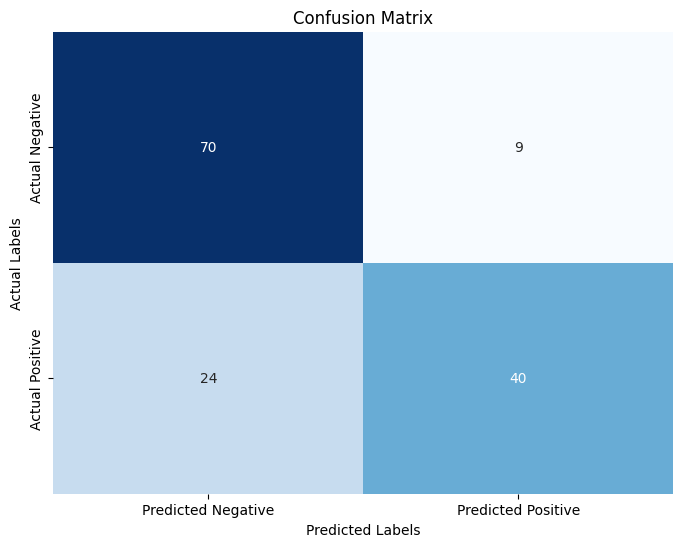

In [30]:
conf_matrix = confusion_matrix(y_val, val_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix offers a detailed breakdown of the model's performance, categorizing the predictions into four key groups:

- **True Positives (TP)**: 40
- **True Negatives (TN)**: 70
- **False Positives (FP)**: 9
- **False Negatives (FN)**: 24

These metrics give insights into the model's ability to generalize to unseen data, helping assess its confidence in predictions made on the test dataset.


|                      | **Predicted Negative** | **Predicted Positive** |
|----------------------|------------------------|------------------------|
| **Actual Negative**   | 70                     | 9                      |
| **Actual Positive**   | 24                     | 40                     |



In [33]:
# Re-train the best model with the entire training data
best_model_standard.fit(X_train_standard, y_train_standard)

# Make final predictions on the test set
final_predictions = best_model_standard.predict(X_test_standard)

# Display the first 5 predictions
print(final_predictions[:5])

['Did Not Survive' 'Did Not Survive' 'Did Not Survive' 'Survived'
 'Did Not Survive']
